# Calibrate Vasicek Model 

# Part One : Derive the Formula of Eurodollar future rate

### Step 1 : Find the ODE

From the Vasicek Model, we can get the information that:
$$
dr(t) = {\mu - \kappa r(t)}dt + \sqrt{\sigma}dW(t)
$$
Now, Let's suppose that the price of P can be written as:
$$
p(t,T) = e^{A(t,T) - B(t, T)r(t)}
$$
Apply Ito's Lemma:
$$
dp(t,T) = \frac{\partial p(t,T)}{\partial t}dt + \frac{\partial p(t,T)}{\partial r}dr + \frac{1}{2}\frac{\partial^2 p(t,T)}{\partial r^2}(dr)^2
$$
Individually, we can sovle the partial derivatives and get the result:
$$
\frac{\partial p(t,T)}{\partial t} = (\frac{dA(t,T)}{dt} - r(t)\frac{dB(t,T)}{dt})p(t,T)
$$
$$
\frac{\partial p(t,T)}{\partial r} = -B(t,T)p(t,T)
$$
$$
\frac{\partial^2 p(t,T)}{\partial r^2} = B^2(t,T)p(t,T)
$$
Now, plug in the result above, we get that:
$$
\frac{dp(t,T)}{p(t,T)} = (\frac{dA(t,T)}{dt} - r(t)\frac{dB(t,T)}{dt})dt - B(t,T)[(\mu - \kappa r(t))dt + \sqrt{\sigma}dW(t)]+ \frac{1}{2}B^2(t,T)(\sigma)dt
$$
rearange the terms in the equation, we get:
$$
\frac{dp(t,T)}{p(t,T)} = [\frac{dA(t,T)}{dt}-r(t)\frac{dB(t,T)}{dt} - B(t,T)(\mu - \kappa r(t)) + \frac{1}{2}B^2(t,T)(\sigma)]dt-B(t,T)\sqrt{\sigma}dW(t)
$$
Under the risk-neutral measure, we have:
$$
\frac{dA(t,T)}{dt}-r(t)\frac{dB(t,T)}{dt} - B(t,T)(\mu - \kappa r(t)) + \frac{1}{2}B^2(t,T)(\sigma) = r
$$
Then we can get the following equations:
$$
\frac{dA(t,T)}{dt} - B(t,T)\mu + \frac{1}{2}B^2(t,T)\sigma = (1+\frac{dB(t,T)}{dt}-\kappa B(t,T))r
$$
In order to satisfy the equation above, we should satisfy the following two equations:
$$
\frac{dA(t,T)}{dt}-B(t,T)\mu + \frac{1}{2}\sigma B^2(t,T) = 0
$$
$$
\frac{dB(t,T)}{dt}-\kappa B(t,T)+ 1 = 0
$$

### Step 2 : Solve the ODE

What we should do next is to solve the ODE, and we get:
$$
B(t,T) = \frac{1}{\kappa}-\frac{1}{\kappa}e^{-\kappa(T-t)}
$$
$$
A(t,T) = -(\frac{\mu}{\kappa}-\frac{\sigma}{2\kappa^2})(T-t)+(\frac{\mu}{\kappa^2}-\frac{3\sigma}{4\kappa^3})-(\frac{\mu}{\kappa^2}-\frac{\sigma}{\kappa^3})e^{-\kappa(T-t)}-\frac{\sigma}{4\kappa^3}e^{-2\kappa(T-t)}
$$

### Step 3 : Find the relationship between zero coupon bond and Eurodollar future rate

$$
F_{t}=\frac{1}{\delta}E_{t}^{Q}[\frac{p(T_{0},T_{1})}{p(T_{0},T_{2})}] - \frac{1}{\delta}
$$
$$
F_{t} = \frac{1}{\delta}E_{t}^{Q}[e^{A(T_0,T_1)-A(T_0,T_2)-[B(T_0,T_1)-B(T_0,T_2)]r(T_0)}]-\frac{1}{\delta}
$$

# Part Two : Get the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import QuantLib as ql
import quandl

In [2]:
token = "su-Y2qYf7QBdkC42qmT3"
n = range(1,21)
nms = ["CHRIS/CME_ED"+str(i) for i in n]
dfs = [quandl.get(nm, authtoken=token) for nm in nms]
dfs_settle = []
name_list = []
for i in range(len(dfs)):
    dfs_settle.append(dfs[i]['Settle'])
    name_list.append('Settle_ED' + str(i+1))
df = pd.concat(dfs_settle, axis = 1)
df.columns = name_list
df.tail()

,Settle_ED1,Settle_ED2,Settle_ED3,Settle_ED4,Settle_ED5,Settle_ED6,Settle_ED7,Settle_ED8,Settle_ED9,Settle_ED10,Settle_ED11,Settle_ED12,Settle_ED13,Settle_ED14,Settle_ED15,Settle_ED16,Settle_ED17,Settle_ED18,Settle_ED19,Settle_ED20
Date,,,,,,,,,,,,,,,,,,,,
2019-05-07,97.4600,97.53,97.550,97.665,97.750,97.825,97.845,97.880,97.875,97.870,97.850,97.835,97.810,97.785,97.755,97.730,97.695,97.660,97.620,97.590
2019-05-08,97.4600,97.52,97.540,97.650,97.730,97.795,97.810,97.845,97.835,97.830,97.810,97.800,97.770,97.745,97.715,97.690,97.655,97.620,97.580,97.550
2019-05-09,97.4750,97.54,97.565,97.680,97.765,97.830,97.845,97.880,97.870,97.865,97.845,97.830,97.800,97.775,97.745,97.720,97.685,97.650,97.610,97.580
2019-05-10,97.4850,97.56,97.585,97.700,97.780,97.845,97.850,97.880,97.870,97.865,97.840,97.825,97.795,97.770,97.740,97.715,97.680,97.645,97.605,97.575
2019-05-13,97.5025,97.61,97.655,97.790,97.880,97.945,97.945,97.970,97.955,97.945,97.920,97.900,97.865,97.835,97.805,97.775,97.740,97.705,97.665,97.630


In [3]:
df.loc['2019-05-13']

Settle_ED1     97.5025
Settle_ED2     97.6100
Settle_ED3     97.6550
Settle_ED4     97.7900
Settle_ED5     97.8800
Settle_ED6     97.9450
Settle_ED7     97.9450
Settle_ED8     97.9700
Settle_ED9     97.9550
Settle_ED10    97.9450
Settle_ED11    97.9200
Settle_ED12    97.9000
Settle_ED13    97.8650
Settle_ED14    97.8350
Settle_ED15    97.8050
Settle_ED16    97.7750
Settle_ED17    97.7400
Settle_ED18    97.7050
Settle_ED19    97.6650
Settle_ED20    97.6300
Name: 2019-05-13 00:00:00, dtype: float64

In [4]:
### Find the interval between today and next maturity
imm = ql.IMM()
today = ql.Date(13,5,2019)
d1 = ql.Date(13,5,2019)
d2 = imm.nextDate(d1)
d2-d1

37

In [5]:
### Get the term
x = range(0,20,1)
term = np.array([xx/4. for xx in x]) + (d2-d1)/365

In [6]:
### Initialize the parameters
mu = 0.005
r0 = 0.015
kappa = 0.1
vol = 0.008

# Part Three : Build the Model and Set up the optimizer

In [7]:
class Model:
    def __init__(self,r0,mu,kappa,vol):
        self.r0 = r0
        self.mu = mu
        self.kappa = kappa
        self.vol = vol
        self.var = vol*vol
    
    def A(self,tau):
        return -(self.mu/self.kappa-self.vol/(2*self.kappa**2))*tau + (self.mu/self.kappa**2-3*self.vol/(4*self.kappa**3))-(self.mu/self.kappa**2-self.vol/self.kappa**3)*np.exp(-self.kappa*tau)-self.vol/(4*self.kappa**3)*np.exp(-2*self.kappa*tau)

    def B(self,tau):
        return 1/self.kappa - 1/self.kappa*np.exp(-self.kappa*tau)

    def zero(self,t0,T,r_t0):
        tau = T-t0
        return np.exp(self.A(tau)-self.B(tau)*r_t0)
    
    def Expectation(self,t0):
        return self.r0*np.exp(-self.kappa*t0)+self.mu/self.kappa*(1-np.exp(-self.kappa*t0))
    
    def Variance(self,t0):
        return self.vol/(2*self.kappa)*(1-np.exp(-2*self.kappa*t0))
    
    def mean_rate(self,t_fix,T0,T1,dist='Q',accrual=0.25):
        A_diff = self.A(T0-t_fix) - self.A(T1-t_fix)
        B_diff = self.B(T0-t_fix) - self.B(T1-t_fix)
        m = A_diff - B_diff * self.Expectation(t_fix)
        v = self.Variance(t_fix)
        e = np.exp(m+v/2*(B_diff**2))
        return 1/accrual * (e-1)
    
    def update_params(self,x):
        self.r0=x[0]
        self.mu=x[1]
        self.kappa=x[2]
        self.vol=x[3]
        self.var = pow(x[3],2)

In [8]:
from scipy.optimize import least_squares, leastsq
class Fitter:
    def __init__(self,model,fut_data,terms):
        self.model = model
        self.data = np.array(fut_data)
        self.terms = terms
    
    def residuals(self,x):
        m = self.model
        m.update_params(x)
        rate_dist = [m.mean_rate(t,t,t+0.25)*100 for t in self.terms]
        residual = np.array(rate_dist) - self.data
        return residual
    
    def fit(self,x0):
        bound_lower = [0,-np.inf,-np.inf,0]
        bound_upper = [np.inf,np.inf,np.inf,np.inf]
        return least_squares(self.residuals,x0,method='trf', bounds=(bound_lower,bound_upper))

In [9]:
### Fit the model
m = Model(r0, mu, kappa, vol)
rate_real = np.array(100 - df.loc['2019-05-13'])
fit = Fitter(m, rate_real, term)
result = fit.fit([r0, mu, kappa, vol])
print('The parameters are calibrated as:',result.x)

The parameters are calibrated as: [ 0.04203134 -0.08581365 -0.01501722  0.65517353]


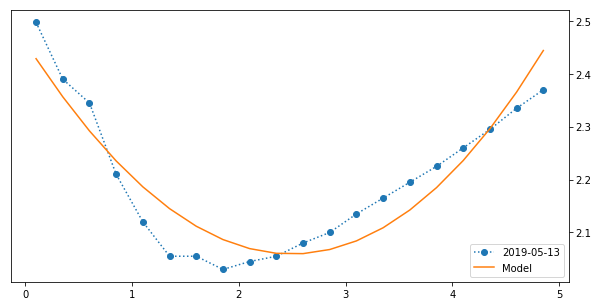

In [10]:
### Check the result
model_fit = [m.mean_rate(t, t, t+0.25)*100 for t in term]
def plot_futures(dt,frame,x,y):
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()  
    crv = frame.loc[dt]
    crv_rates = [100-z for z in crv.values]
    plots = [plt.plot(x,crv_rates,label=dt,linestyle="dotted",marker='o'),plt.plot(x,y,label='Model')]
    plt.legend(loc='lower right')    
    plt.show()
plot_futures('2019-05-13',df,term,model_fit)